### Take in a camera (warped) image and output the undistorted image with chessboard corners drawn on it. Given that the input is a chessboard, this makes good sense.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

find corners, calibrate your camera, undistort an image, and apply a perspective transform

#Find Corners

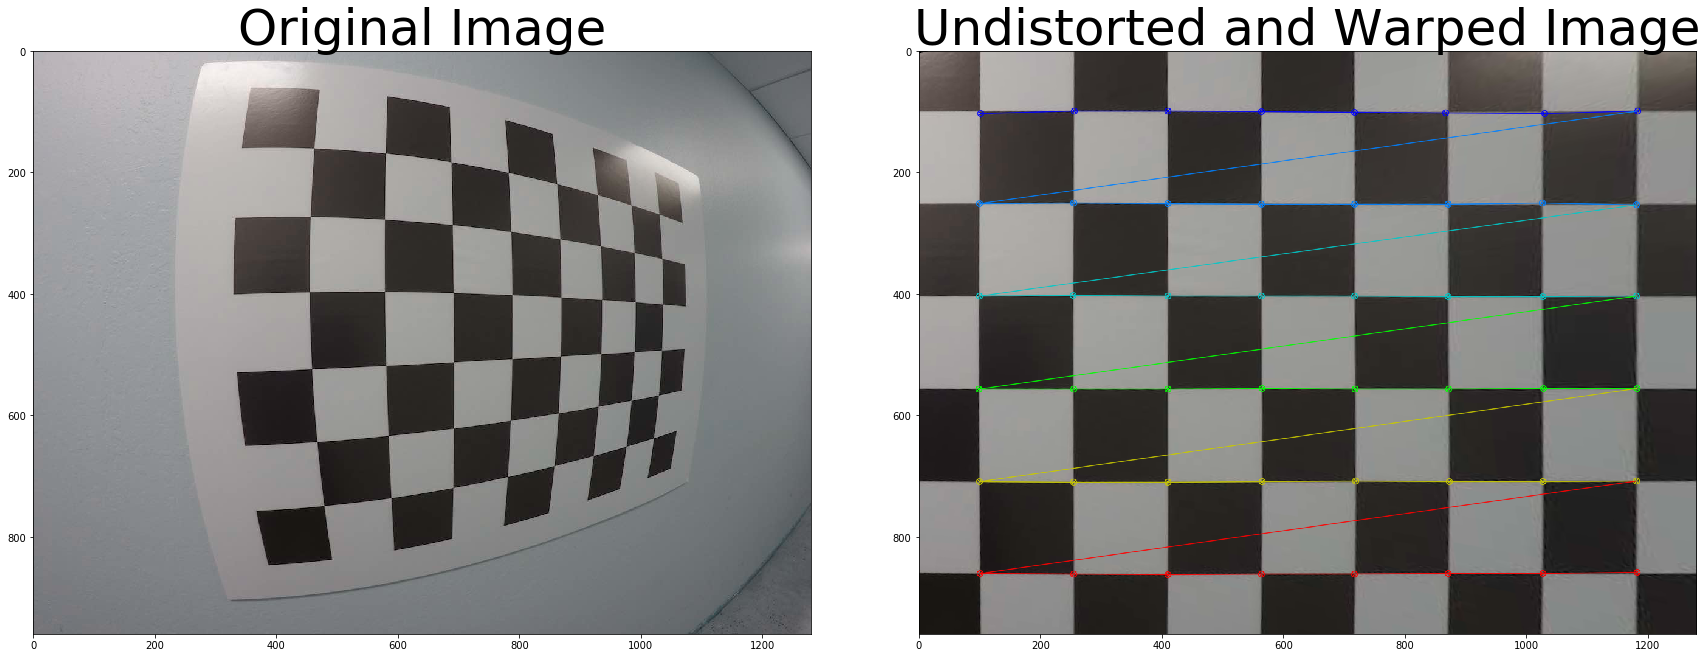

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from copy import deepcopy

# These are the arrays calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]


img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y


# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    new_img = np.copy( img )
    
    # Bear in mind that undistort takes camera calibration data
    # from a call to cv2.calibrateCamera which uses a similar 
    # pictures at many different angles (at best)
    new_img = cv2.undistort(new_img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)   
    
    if ret == True:
        
        offset = 100
        img_size = (gray.shape[1], gray.shape[0])
        
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])        
        
        M = cv2.getPerspectiveTransform(src,dst)
        img_size = (gray.shape[1], gray.shape[0])
        unwarped = cv2.warpPerspective(new_img, M, img_size, flags=cv2.INTER_LINEAR)
        
        ret2, corners2 = cv2.findChessboardCorners(unwarped, (nx,ny),None)
        if ret2 == True:            
            unwarped = cv2.drawChessboardCorners(unwarped, (nx,ny), corners2, ret2)
        return img,unwarped
        
    return None


img_1, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_1)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(perspective_M,cmap='gray')
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)